### Projeto economia - Borracha exportação 2023- Brasil

In [1]:
# bibliotecas e formatos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
import nbformat

#estilo plt
plt.style.use("ggplot")

#formato numerico pandas
pd.options.display.float_format = '{:.2f}'.format

#### Extraindo dados,tratando e explorando

In [2]:
#extração de dados
df = pd.read_csv('Base_Dados_economia_borracha.csv',sep=";")
#filtando apenas secção de platicos e borrachas
df = df[df["Codigo Seção"] == "VII"]
print(df.shape)

(1798, 7)


In [3]:
df.head()

,Ano,Mês,País,Codigo Seção,Descrição Seção,Valor FOB (US$),Quilograma Líquido
0,2023,12,Afeganistão,VII,Plásticos e suas obras; Borracha e suas obras,1588,8
9,2023,12,África do Sul,VII,Plásticos e suas obras; Borracha e suas obras,738137,150770
26,2023,12,Albânia,VII,Plásticos e suas obras; Borracha e suas obras,2276,95
39,2023,12,Alemanha,VII,Plásticos e suas obras; Borracha e suas obras,4800496,631260
53,2023,12,Andorra,VII,Plásticos e suas obras; Borracha e suas obras,26,3


In [4]:
df.dtypes

Ano                    int64
Mês                    int64
País                  object
Codigo Seção          object
Descrição Seção       object
Valor FOB (US$)        int64
Quilograma Líquido     int64
dtype: object

In [5]:
#valores nulos
df.isnull().sum()

Ano                   0
Mês                   0
País                  0
Codigo Seção          0
Descrição Seção       0
Valor FOB (US$)       0
Quilograma Líquido    0
dtype: int64

In [6]:
df.nunique()

Ano                      1
Mês                     12
País                   205
Codigo Seção             1
Descrição Seção          1
Valor FOB (US$)       1723
Quilograma Líquido    1439
dtype: int64

In [7]:
df.describe()

,Ano,Mês,Valor FOB (US$),Quilograma Líquido
count,1798.00,1798.00,1798.00,1798.00
mean,2023.00,6.56,2732415.12,1015685.82
std,0.00,3.42,10665272.90,3500053.77
min,2023.00,1.00,0.00,0.00
25%,2023.00,4.00,3850.25,205.25
50%,2023.00,7.00,75825.50,17050.50
75%,2023.00,10.00,731525.75,173566.00
max,2023.00,12.00,129726001.00,40240084.00


In [8]:
## Transformando coluna de data pra serie temporal
df['Data'] = df['Ano'].astype('str') + '-' + df['Mês'].astype('str') + '-1'
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Ano,Mês,País,Codigo Seção,Descrição Seção,Valor FOB (US$),Quilograma Líquido,Data
0,2023,12,Afeganistão,VII,Plásticos e suas obras; Borracha e suas obras,1588,8,2023-12-01
9,2023,12,África do Sul,VII,Plásticos e suas obras; Borracha e suas obras,738137,150770,2023-12-01
26,2023,12,Albânia,VII,Plásticos e suas obras; Borracha e suas obras,2276,95,2023-12-01
39,2023,12,Alemanha,VII,Plásticos e suas obras; Borracha e suas obras,4800496,631260,2023-12-01
53,2023,12,Andorra,VII,Plásticos e suas obras; Borracha e suas obras,26,3,2023-12-01


In [9]:
df.dtypes

Ano                            int64
Mês                            int64
País                          object
Codigo Seção                  object
Descrição Seção               object
Valor FOB (US$)                int64
Quilograma Líquido             int64
Data                  datetime64[ns]
dtype: object

In [10]:
## Vendas por país
total = df['Valor FOB (US$)'].sum()
anl_pais = df.groupby(by = ['País']).agg(df=('Valor FOB (US$)','sum'))
anl_pais.rename(columns={"df":"Valor FOB (US$)"},inplace=True)
anl_pais = anl_pais.sort_values(by='Valor FOB (US$)', ascending=False).reset_index()
anl_pais['Percentual'] = (anl_pais['Valor FOB (US$)'] / total) * 100
anl_pais['Percentual'] = round(anl_pais['Percentual'] ,0)
anl_pais['Percentual'] =  anl_pais['Percentual'].astype('str') + '%'
anl_pais = anl_pais.head(15)

,País,Valor FOB (US$),Percentual
0,Argentina,1235898534,25.0%
1,Estados Unidos,682043303,14.0%
2,Chile,368847379,8.0%
3,México,321639554,7.0%
4,Paraguai,288639363,6.0%
5,Colômbia,266188767,5.0%
6,Peru,169248781,3.0%
7,China,162660501,3.0%
8,Uruguai,158219628,3.0%
9,Bolívia,157599009,3.0%


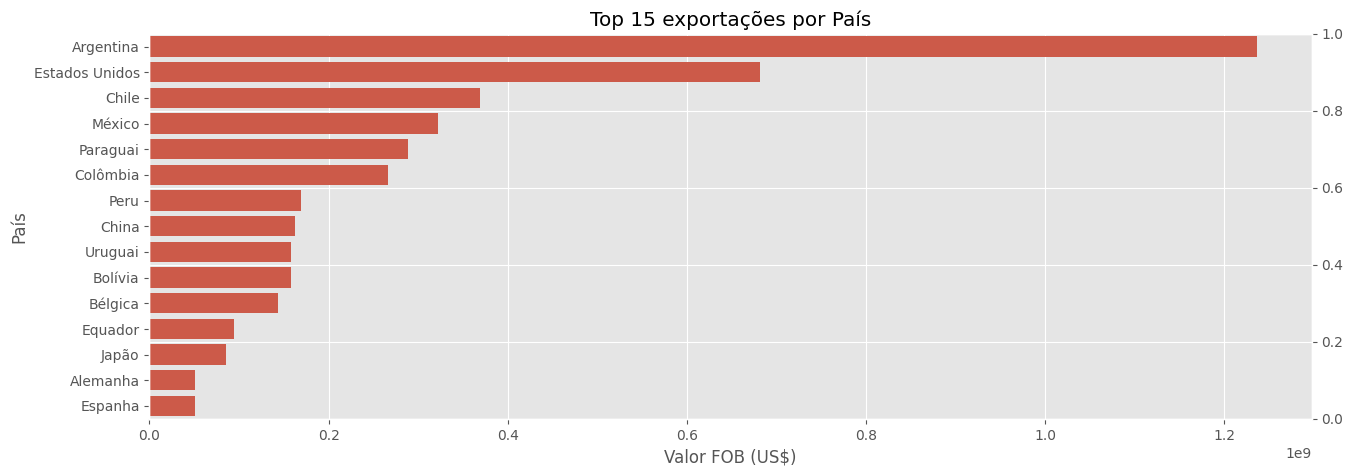

In [11]:
#plot Vendas por país com dois eixos Y
plt.figure(figsize=(15,5))
plt.title('Top 15 exportações por País')

ax1 = sns.barplot(data=anl_pais,y='País',x='Valor FOB (US$)',orient="y")
ax2 = ax1.twinx()
#sns.lineplot(data=anl_pais,y='País',x='Percentual',orient="y")
anl_pais

#### serie temporal

<Axes: title={'center': 'Serie Geral'}, xlabel='Data', ylabel='Valor FOB (US$)'>

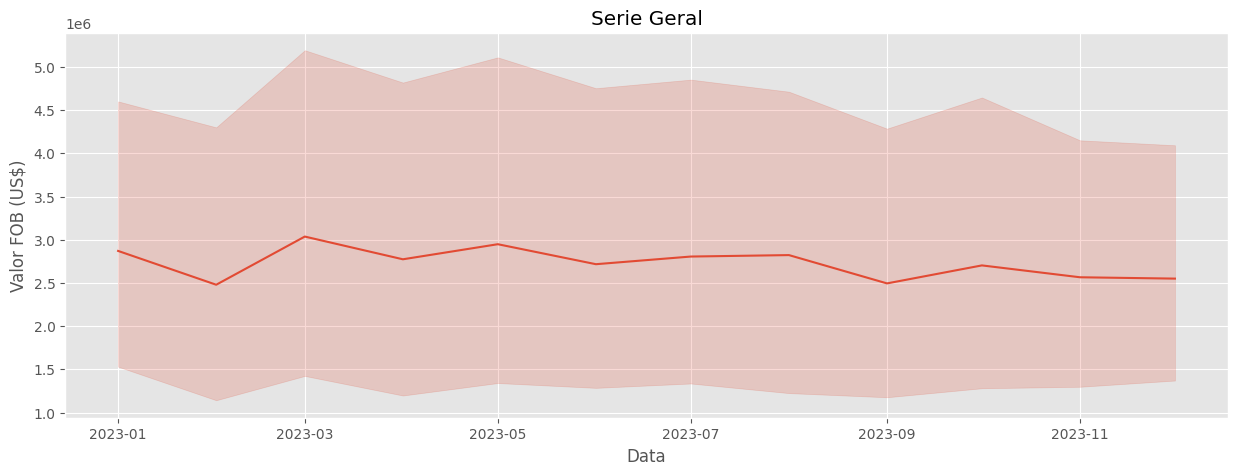

In [12]:
plt.figure(figsize=(15,5))
plt.title('Serie Geral')
sns.lineplot(data=df,y='Valor FOB (US$)',x='Data')

In [17]:
# Criar lista de países únicos
countries = anl_pais['País'].unique()

# Criar a figura com 3 colunas e 5 linhas
fig = subplots.make_subplots(rows=5, cols=3, subplot_titles=countries)

# Adicionar um gráfico de linha para cada país
for i, country in enumerate(countries):
    # Filtrar dados para o país específico
    country_data = df[df['País'] == country]
    
    # Criar o gráfico de linha
    fig.add_trace(
        px.line(country_data, x='Data', y='Valor FOB (US$)', title=country).data[0],
        row=(i // 3) + 1, col=(i % 3) + 1
    )

# Atualizar layout da figura
fig.update_layout(height=800, width=1500, title_text="Séries Temporais por País")
fig.show()